# Uniendo dataframes

In [1]:
import pandas as pd

df = pd.DataFrame([{'Nombre': 'Maria', 'Item': 'Esponja', 'Costo': 22500},
                   {'Nombre': 'Mario', 'Item': 'Arena de gato', 'Costo': 2500},
                   {'Nombre': 'Andres', 'Item': 'Cuchara', 'Costo': 5000}],
                  index=['Tienda 1', 'Tienda 1', 'Tienda 2'])
df

,Nombre,Item,Costo
Tienda 1,Maria,Esponja,22500
Tienda 1,Mario,Arena de gato,2500
Tienda 2,Andres,Cuchara,5000


In [2]:
df['Fecha'] = ['Diciembre 1', 'Febrero 15', 'Septiembre 14']
df

,Nombre,Item,Costo,Fecha
Tienda 1,Maria,Esponja,22500,Diciembre 1
Tienda 1,Mario,Arena de gato,2500,Febrero 15
Tienda 2,Andres,Cuchara,5000,Septiembre 14


In [3]:
df['Enviado'] = True
df

,Nombre,Item,Costo,Fecha,Enviado
Tienda 1,Maria,Esponja,22500,Diciembre 1,True
Tienda 1,Mario,Arena de gato,2500,Febrero 15,True
Tienda 2,Andres,Cuchara,5000,Septiembre 14,True


In [4]:
df['Opiniones'] = ['Positiva', None, 'Negativa']
df

,Nombre,Item,Costo,Fecha,Enviado,Opiniones
Tienda 1,Maria,Esponja,22500,Diciembre 1,True,Positiva
Tienda 1,Mario,Arena de gato,2500,Febrero 15,True,None
Tienda 2,Andres,Cuchara,5000,Septiembre 14,True,Negativa


In [6]:
nuevo = df.reset_index()
nuevo['Fecha'] = pd.Series({0: 'Diciembre 1', 2: 'Septiembre 14'})
nuevo

,index,Nombre,Item,Costo,Fecha,Enviado,Opiniones
0,Tienda 1,Maria,Esponja,22500,Diciembre 1,True,Positiva
1,Tienda 1,Mario,Arena de gato,2500,NaN,True,None
2,Tienda 2,Andres,Cuchara,5000,Septiembre 14,True,Negativa


La anterior operacion nos muestra que podemos reajustar nuestro dfs para que ignoren datos que no queremos, y pandas los rellenara con NaNs

## Diagramas de venn y uniones de dataframes

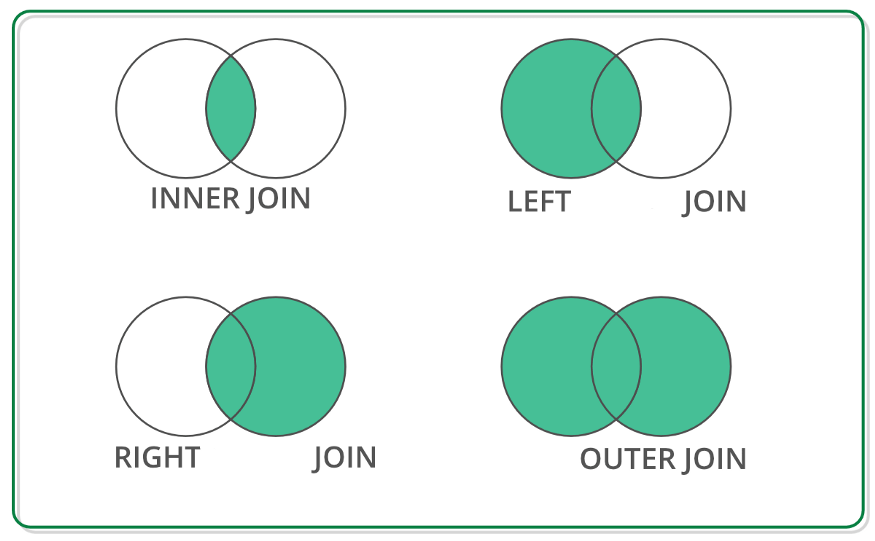

In [7]:
equipo_df = pd.DataFrame([{'Nombre': 'Kelly', 'Rol': 'Director of HR'},
                         {'Nombre': 'Sally', 'Rol': 'Course liasion'},
                         {'Nombre': 'James', 'Rol': 'Grader'}])
equipo_df = equipo_df.set_index('Nombre')

estudiante_df = pd.DataFrame([{'Nombre': 'James', 'Escuela': 'Business'},
                           {'Nombre': 'Mike', 'Escuela': 'Law'},
                           {'Nombre': 'Sally', 'Escuela': 'Engineering'}])
estudiante_df = estudiante_df.set_index('Nombre')

print(equipo_df.head())
print()
print(estudiante_df.head())

                   Rol
Nombre                
Kelly   Director of HR
Sally   Course liasion
James           Grader

            Escuela
Nombre             
James      Business
Mike            Law
Sally   Engineering


In [8]:
pd.merge(equipo_df, estudiante_df, how = "outer", left_index= True, right_index = True)

,Rol,Escuela
Nombre,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [9]:
pd.merge(equipo_df, estudiante_df, how = "inner", left_index= True, right_index = True)

,Rol,Escuela
Nombre,,
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
pd.merge(equipo_df, estudiante_df, how = "left", left_index= True, right_index = True)

,Rol,Escuela
Nombre,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [11]:
pd.merge(equipo_df, estudiante_df, how = "right", left_index= True, right_index = True)

,Rol,Escuela
Nombre,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [12]:
equipo_df = equipo_df.reset_index()
estudiante_df =estudiante_df.reset_index()

In [13]:
equipo_df

,Nombre,Rol
0,Kelly,Director of HR
1,Sally,Course liasion
2,James,Grader


In [14]:
estudiante_df

,Nombre,Escuela
0,James,Business
1,Mike,Law
2,Sally,Engineering


In [15]:
pd.merge(equipo_df, estudiante_df, how='left', left_on='Nombre', right_on='Nombre')

,Nombre,Rol,Escuela
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [16]:
equipo_df = pd.DataFrame([{'Nombre': 'Kelly', 'Rol': 'Director of HR', 'Localizacion': 'State Street'},
                         {'Nombre': 'Sally', 'Rol': 'Course liasion', 'Localizacion': 'Washington Avenue'},
                         {'Nombre': 'James', 'Rol': 'Grader', 'Localizacion': 'Washington Avenue'}])
estudiante_df = pd.DataFrame([{'Nombre': 'James', 'Escuela': 'Business', 'Localizacion': '1024 Billiard Avenue'},
                           {'Nombre': 'Mike', 'Escuela': 'Law', 'Localizacion': 'Fraternity House #22'},
                           {'Nombre': 'Sally', 'Escuela': 'Engineering', 'Localizacion': '512 Wilson Crescent'}])


In [17]:
equipo_df

,Nombre,Rol,Localizacion
0,Kelly,Director of HR,State Street
1,Sally,Course liasion,Washington Avenue
2,James,Grader,Washington Avenue


In [18]:
estudiante_df

,Nombre,Escuela,Localizacion
0,James,Business,1024 Billiard Avenue
1,Mike,Law,Fraternity House #22
2,Sally,Engineering,512 Wilson Crescent


In [19]:
pd.merge(equipo_df, estudiante_df, how='left', left_on='Nombre', right_on='Nombre')

,Nombre,Rol,Localizacion_x,Escuela,Localizacion_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


## <span class="burk">MINIDESAFIO</span>

Aquí hay dos DataFrames, productos y facturas. El DataFrame del producto tiene un identificador y un precio de etiqueta. El DataFrame de facturas enumera las personas, los identificadores de productos y la cantidad. Suponiendo que queremos generar totales, ¿cómo unimos estos dos DataFrames para tener uno que enumere toda la información que necesitamos?

DataFrame de productos:

            Precio	Producto
     ID		
    4109	5.0	Sushi Roll
    1412	0.5	Egg
    8931	1.5	Bagel

DataFrame de facturas:

    Comprador	      ID	Cantidad
        Ali	        4109	  1
	   Eric	        1412	  12
	   Ande	        8931	  6
	   Sam	         4109	  2


# Haciendo a pandas pandorable

In [ ]:
import pandas as pd
df = pd.read_csv('census.csv')
df

In [ ]:
(df.where(df['SUMLEV']==50).dropna().set_index(['STNAME','CTYNAME']).rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

In [ ]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

In [ ]:
import numpy as np
def min_max(row):
    datos = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(datos), 'max': np.max(datos)})

In [ ]:
df.apply(min_max, axis=1)

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

# Agrupacion: Group by

In [ ]:
import pandas as pd
df = pd.read_csv('census.csv')
df

In [ ]:
df.groupby('STNAME')['POPESTIMATE2010'].agg(avg = np.average, sum = np.sum)

In [ ]:
df.groupby('STNAME')[['POPESTIMATE2010', 'CENSUS2010POP']].agg({'POPESTIMATE2010': np.average, 'CENSUS2010POP': np.sum})

# Pivot tables

In [ ]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')
df.head()

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min], margins=True)

In [ ]:
df.head()

In [ ]:
df.sort_values("(kW)")

In [ ]:
df

In [ ]:
df.sort_values("(kW)", ascending=False)

In [ ]:
df.sort_index

## <span class="burk">MINIDESAFIO</span>

**1.** Escribir un programa que pregunte al usuario por las ventas de productos en diferentes tiendas y muestre por pantalla un DataFrame con los datos de las ventas indexada por las tiendas, antes y después de aplicarles un descuento del 10%.

**2.** Importe el archivo census.csv y agrupe los datos por region